<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/2_transfer_learning_roadmap/5_exploring_model_families/2_vgg/1.2)%20Intro%20to%20vgg%20network%20-%20pytorch%20backend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goals


### Train a architectural heritage site classifier using vgg16

### Understand what lies inside vgg network

# What is vgg

## Readings on vgg

  1) Points from https://towardsdatascience.com/vgg-neural-networks-the-next-step-after-alexnet-3f91fa9ffe2c
    - VGG addresses another very important aspect of CNNs: depth
    - All of VGG’s hidden layers use ReLU
    - Unlike 11x11 kernels of alexnet, it uses smaller ones 1x1 and 3x3 kernels


  2) Points from https://becominghuman.ai/what-is-the-vgg-neural-network-a590caa72643
    - Intuitively, more layer is better. However, the authors found that VGG-16 is better than VGG-19
    - Authors introduce multi-scale evaluationin the paper
  
  
  3) Read more here - 
    - https://arxiv.org/abs/1409.1556
    - https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
    - https://www.cs.toronto.edu/~frossard/post/vgg16/
    - https://d2l.ai/chapter_convolutional-modern/vgg.html



# Table of Contents


## [0. Install](#0)


## [1. Load experiment with vgg base architecture](#1)


## [2. Visualize vgg](#2)


## [3. Train the classifier](#3)


## [4. Run inference on trained classifier](#5)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [5]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

Cloning into 'monk_v1'...
remote: Enumerating objects: 200, done.
remote: Counting objects: 100% (200/200), done.
remote: Compressing objects: 100% (146/146), done.
remote: Total 2105 (delta 110), reused 116 (delta 53), pack-reused 1905
Receiving objects: 100% (2105/2105), 73.71 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (1130/1130), done.


In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

## Dataset - Architectural Heritage site Classification
    - https://old.datahub.io/dataset/architectural-heritage-elements-image-dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1MFu7cnxwDM7LWKgeLggMLvWIBW_-YCWC' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1MFu7cnxwDM7LWKgeLggMLvWIBW_-YCWC" -O architectural_heritage.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq architectural_heritage.zip

# Imports

In [1]:
# Monk
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
#Using pytorch backend 
from pytorch_prototype import prototype

<a id='1'></a>
# Load experiment with vgg base architecture

## Creating and managing experiments
    - Provide project name
    - Provide experiment name
    - For a specific data create a single project
    - Inside each project multiple experiments can be created
    - Every experiment can be have diferent hyper-parameters attached to it

In [3]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "vgg-intro");

Pytorch Version: 1.2.0

Experiment Details
    Project: Project
    Experiment: vgg-intro
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Project/vgg-intro/



### This creates files and directories as per the following structure
    
    
    workspace
        |
        |--------Project
                        |
                        |
                        |-----vgg-intro
                                    |
                                    |-----experiment-state.json
                                    |
                                    |-----output
                                            |
                                            |------logs (All training logs and graphs saved here)
                                            |
                                            |------models (all trained models saved here)

## Set dataset and select the model

## Quick mode training

    - Using Default Function
        - dataset_path
        - model_name
        - freeze_base_network
        - num_epochs
        
        
## Sample Dataset folder structure

    architectural_heritage
        |
        |-----train
                |------dome
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------altal
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)
         |
         |
         |-----val
                |------dome
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)
                |------altal
                        |
                        |------img1.jpg
                        |------img2.jpg
                        |------.... (and so on)   
                |------.... (and so on)

In [4]:
gtf.Default(dataset_path="architectural_heritage/train", 
            model_name="vgg16", 
            freeze_base_network=False,
            num_epochs=5);

Dataset Details
    Train path:     architectural_heritage/train
    Val path:       None
    CSV train path: None
    CSV val path:  None

Dataset Params
    Input Size:  224
    Batch Size:  4
    Data Shuffle: True
    Processors:   4
    Train-val split:   0.7

Pre-Composed Train Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Pre-Composed Val Transforms
[{'RandomHorizontalFlip': {'p': 0.8}}, {'Normalize': {'mean': [0.485, 0.456, 0.406], 'std': [0.229, 0.224, 0.225]}}]

Dataset Numbers
    Num train images: 7164
    Num val images:   3071
    Num classes:      10

Model Params
    Model name:           vgg16
    Use Gpu:              True
    Use pretrained:       True
    Freeze base network:  False

Model Details
    Loading pretrained model


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/abhi/.cache/torch/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [01:59<00:00, 4.62MB/s]   


    Model Loaded on device
        Model name:                           vgg16
        Num layers in model:  16
        Num trainable layers: 16

Optimizer
    Name:          sgd
    Learning rate: 0.01
    Params:        {'lr': 0.01, 'momentum': 0, 'weight_decay': 0, 'momentum_dampening_rate': 0, 'clipnorm': 0.0, 'clipvalue': 0.0}



Learning rate scheduler
    Name:   reduceonplateaulr
    Params: {'mode': 'min', 'factor': 0.1, 'patience': 1, 'verbose': True, 'threshold': 0.0001, 'threshold_mode': 'rel', 'cooldown': 0, 'min_lr': 0, 'epsilon': 1e-08}

Loss
    Name:          softmaxcrossentropy
    Params:        {'weight': None, 'batch_axis': 0, 'axis_to_sum_over': -1, 'label_as_categories': True, 'label_smoothing': False}

Training params
    Num Epochs: 5

Display params
    Display progress:          True
    Display progress realtime: True
    Save Training logs:        True
    Save Intermediate models:  True
    Intermediate model prefix: intermediate_model_



## From the summary above

    - Model Params
        Model name:                           vgg16
        Num of potentially trainable layers:  16
        Num of actual trainable layers:       16

<a id='2'></a>
# Visualize vgg

In [5]:
gtf.Visualize_With_Netron(data_shape=(3, 224, 224), port=8082);

Using Netron To Visualize
Not compatible on kaggle
Compatible only for Jupyter Notebooks
Serving 'model.onnx' at http://localhost:8082


## vgg block - 1
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

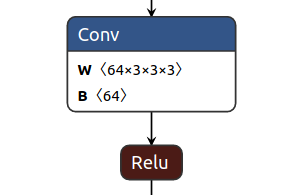

In [6]:
from IPython.display import Image
Image(filename='imgs/vgg_block1_pytorch.png') 

## Properties

  - This block has 3 layers
        - conv -> relu

## vgg block - 2
  
  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

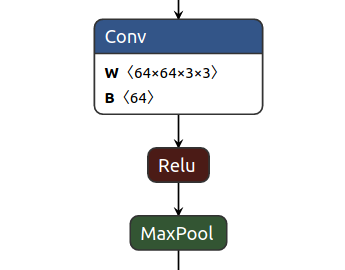

In [7]:
from IPython.display import Image
Image(filename='imgs/vgg_block2_pytorch.png') 

## Properties

  - This block has 3 layers
        - conv -> relu -> max_pool

## vgg fully connected chain

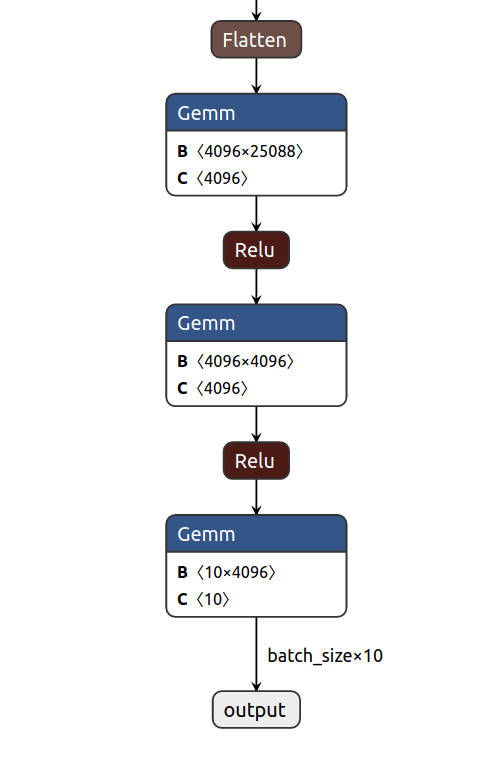

In [8]:
from IPython.display import Image
Image(filename='imgs/vgg_block_fc_pytorch.png') 

## vgg Network

  - Creating network and blocks using monk from scratch will be dealt in different roadmap series

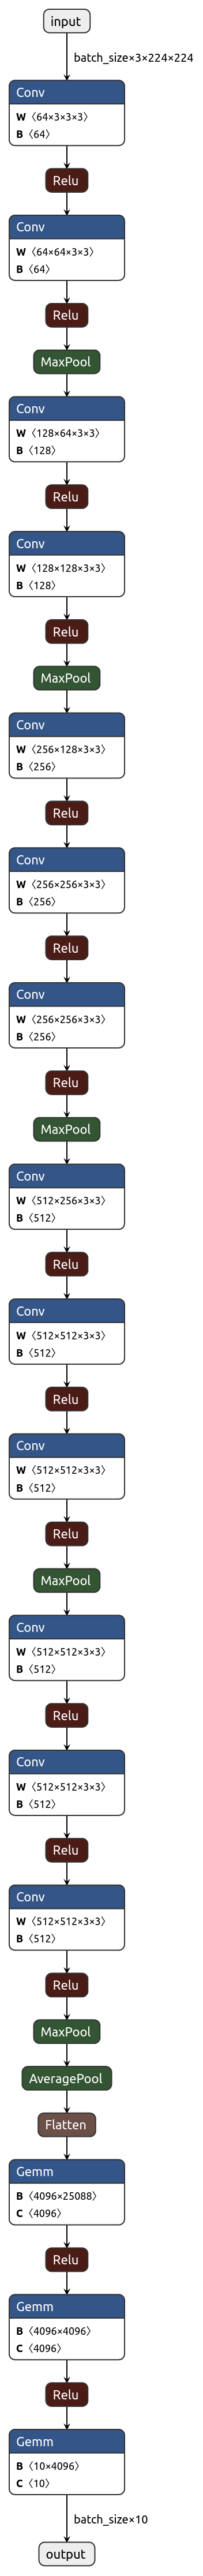

In [9]:
from IPython.display import Image
Image(filename='imgs/vgg16_pytorch.png') 

## Properties

  - This network 
    - has 9 type-1 blocks
    - has 5 type-2 blocks
    - post these blocks the type-3 (fc) block exists


<a id='3'></a>
# Train the classifier

In [10]:
#Start Training
gtf.Train();

#Read the training summary generated once you run the cell and training is completed

Training Start
    Epoch 1/5
    ----------




    curr_lr - 0.01
    [Epoch 1] Train-acc: 0.832, Train-loss: 0.543 | Val-acc: 0.945946, Val-loss: 0.188, | time: 171.8 sec

    Epoch 2/5
    ----------




    curr_lr - 0.01
    [Epoch 2] Train-acc: 0.935, Train-loss: 0.217 | Val-acc: 0.952784, Val-loss: 0.159, | time: 179.6 sec

    Epoch 3/5
    ----------




    curr_lr - 0.01
    [Epoch 3] Train-acc: 0.954, Train-loss: 0.151 | Val-acc: 0.956692, Val-loss: 0.152, | time: 180.8 sec

    Epoch 4/5
    ----------




    curr_lr - 0.01
    [Epoch 4] Train-acc: 0.966, Train-loss: 0.113 | Val-acc: 0.961250, Val-loss: 0.133, | time: 180.3 sec

    Epoch 5/5
    ----------




    curr_lr - 0.01
    [Epoch 5] Train-acc: 0.975, Train-loss: 0.084 | Val-acc: 0.949853, Val-loss: 0.156, | time: 174.9 sec

    Training completed in: 14m 23s
    Best val Acc:          0.961250

Training End

Training Outputs
    Model Dir:   /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Project/vgg-intro/output/models/
    Log Dir:     /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Project/vgg-intro/output/logs/
    Final model: final
    Best model:  best_model
    Log 1 - Validation accuracy history log: val_acc_history.npy
    Log 2 - Validation loss history log:     val_loss_history.npy
    Log 3 - Training accuracy history log:   train_acc_history.npy
    

<Figure size 432x288 with 0 Axes>

<a id='4'></a>
# Run inference on trained classifier

In [11]:
gtf = prototype(verbose=1);
gtf.Prototype("Project", "vgg-intro", eval_infer=True);

Pytorch Version: 1.2.0

Model Details
    Loading model - workspace/Project/vgg-intro/output/models/final
    Model loaded!

Experiment Details
    Project: Project
    Experiment: vgg-intro
    Dir: /home/abhi/Desktop/Work/tess_tool/gui/v0.3/finetune_models/Organization/development/v5.0_blocks/study_roadmap/change_post_num_layers/6_transfer_learning_model_params/1_exploring_model_families/2_vgg/workspace/Project/vgg-intro/



Prediction
    Image name:         architectural_heritage/test/test2.jpg
    Predicted class:      vault
    Predicted score:      5.173099994659424



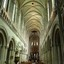

In [16]:
output = gtf.Infer(img_name = "architectural_heritage/test/test2.jpg");
from IPython.display import Image
Image(filename='architectural_heritage/test/test2.jpg') 

Prediction
    Image name:         architectural_heritage/test/test3.jpg
    Predicted class:      dome(outer)
    Predicted score:      12.543463706970215



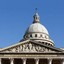

In [17]:
output = gtf.Infer(img_name = "architectural_heritage/test/test3.jpg");
from IPython.display import Image
Image(filename='architectural_heritage/test/test3.jpg') 